In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [22]:
cifre = datasets.load_digits()

In [25]:
print(cifre.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

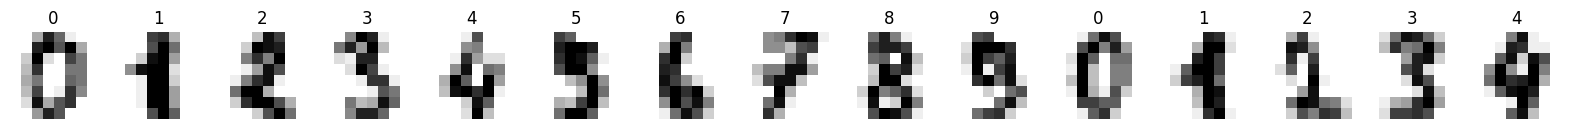

In [26]:
_, axes = plt.subplots(ncols=15, figsize=(20,3))
im=cifre.images
lab=cifre.target
for ax, image, label in zip(axes, im, lab):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)


In [6]:
im.shape

(1797, 8, 8)

In [7]:
X = im.reshape((len(im), -1))
X_tr, X_te, y_tr, y_te = train_test_split(X, lab, test_size=0.1, shuffle=True)

In [27]:
svc = svm.SVC(gamma=0.001)
svc.fit(X_tr, y_tr)

SVC(gamma=0.001)

In [9]:
pred=svc.predict(X_te)

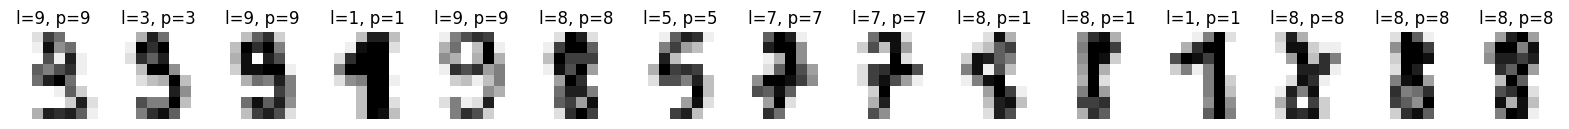

In [28]:
_, axes = plt.subplots(ncols=15, figsize=(20,3))
for ax, image, l, p in zip(axes, X_te, y_te, pred):
    ax.set_axis_off()
    d=image.reshape(8,8)
    ax.imshow(d, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('l={:d}, p={:d}'.format(l, p))


Text(0.5, 0.98, 'Confusion Matrix')

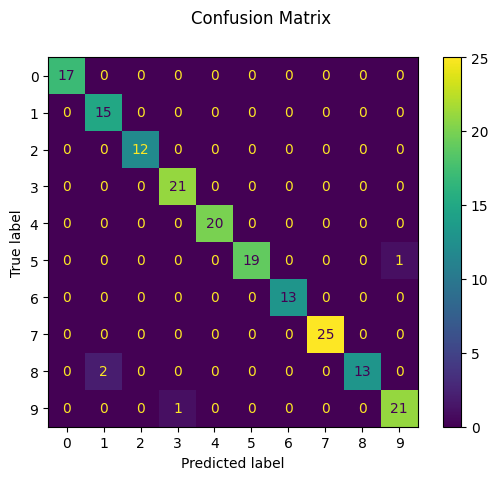

In [29]:
#disp = metrics.plot_confusion_matrix(svc, X_te, y_te)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_te, pred)
disp.figure_.suptitle("Confusion Matrix")

proviamo con la lda

In [30]:
lda = LDA(n_components=6)
lda.fit(X_tr, y_tr)

LinearDiscriminantAnalysis(n_components=6)

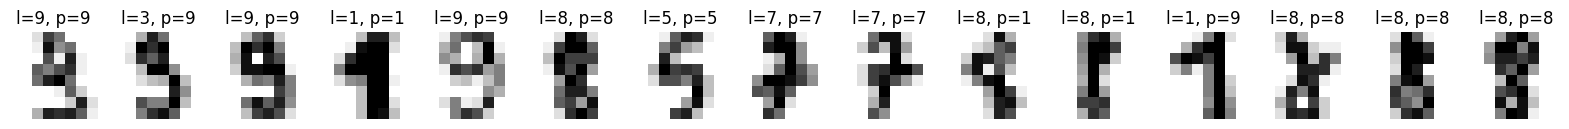

In [31]:
pred_lda=lda.predict(X_te)
_, axes = plt.subplots(ncols=15, figsize=(20,3))
for ax, image, l, p in zip(axes, X_te, y_te, pred_lda):
    ax.set_axis_off()
    d=image.reshape(8,8)
    ax.imshow(d, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('l={:d}, p={:d}'.format(l, p))


Text(0.5, 0.98, 'Confusion Matrix: lda')

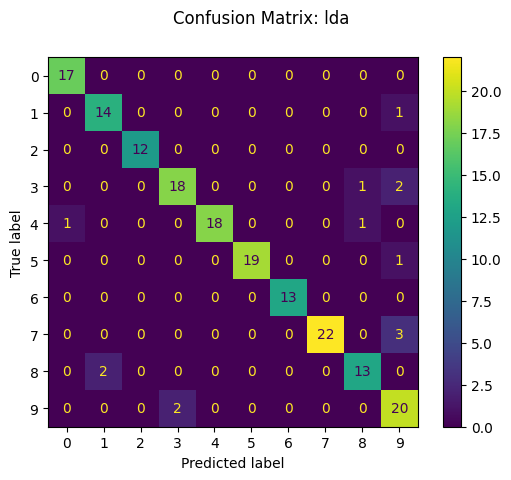

In [32]:
#disp = metrics.plot_confusion_matrix(lda, X_te, y_te)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_te, pred_lda)
disp.figure_.suptitle("Confusion Matrix: lda")

In [33]:
pwd

'/home/fc/hg/metodi_di_calcolo_in_chimica/statistica'